### 1D Bar Problem With Constant Loading

In [1]:
using Flux
using Statistics
using Plots
using CPUTime
using LinearAlgebra

##### Problem to be solved

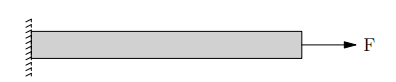



$$
\frac{d(\delta)}{dx} = \frac{F}{A E} \\
\delta (0.0) = 0.0 \space [Boundary \space Condition]\\
length(L) = 10m \\
Area(A) = 0.04m^2 \\
E = 69*10^9 N/m^2 \\
F_t = 5*10^7 N \\
F_c = -5*10^7 N \\
$$

### Input parameters

In [2]:
Area = 0.04 #m2
L = 10 #m
E = 69*10^9 #N/m2
F1 = 5*10^7 #N
F2 = -5*10^7 #N
dx = 0.1 #discritization

# Neural Network parameters
dim = 1
N = 32 # Number of nodes in the hidden layer

32

#### 1st model is for tension and 2nd is for compression

Chain function is used to create the collection of different layers. In the below Neural Network there is one hidden dense layer which contain N nodes each.

Activation Function "tanh" : - 
Activation functions are used to provide non-linearity in the model. There are several activation functions such as 'ReLU', 'LeakyReLU', 'sigmoid' and 'tan-h'(hyperbolic tangent activation function) etc. the reason behind tanh is that it's range is in between [-1, 1] which provides more better results as compared to the sigmoid activation function.
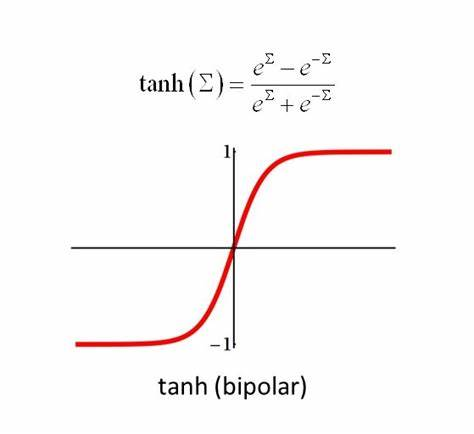

In [3]:
TensionU = Chain(x -> [x], Dense(dim,N,tanh),Dense(N,dim), x -> x[1])

Chain(
  var"#1#3"(),
  Dense(1, 32, tanh),                   # 64 parameters
  Dense(32, 1),                         # 33 parameters
  var"#2#4"(),
)                   # Total: 4 arrays, 97 parameters, 644 bytes.

In [4]:
CompressionU = Chain(x -> [x], Dense(dim,N,tanh),Dense(N,dim), x -> x[1]) 

Chain(
  var"#5#7"(),
  Dense(1, 32, tanh),                   # 64 parameters
  Dense(32, 1),                         # 33 parameters
  var"#6#8"(),
)                   # Total: 4 arrays, 97 parameters, 644 bytes.

### Function to define the governing equation

In [5]:
ϵ = sqrt(eps(Float32))

function ODE_Tension(x)
    return ((TensionU.(x .+ ϵ) .- TensionU.(x)) ./ϵ) .- (F1/(Area*E))
end

function ODE_Compression(x)
    return ((CompressionU.(x .+ ϵ) .- CompressionU.(x)) ./ϵ) .- (F2/(Area*E))
end

ODE_Compression (generic function with 1 method)

### Discretization 

In [6]:
dom = collect(0.0:dx:L)
z1 = 0

0

### Define Loss function

Satisfying boundary conditions and the governing equation at discretized points.

In [7]:
loss1() = sum(norm.((abs2.(ODE_Tension(dom))) .+ abs2.(TensionU.(z1))))
loss2() = sum(norm.((abs2.(ODE_Compression(dom))) .+ abs2.(CompressionU.(z1))))

loss2 (generic function with 1 method)

### Define Neural network parameters (ps1) for Tension model and optimizers to train the model

In [8]:
ps1 = Flux.params(TensionU)
opt1 = Flux.ADAM(0.01)
data1 = Iterators.repeated((),1500)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{}}}(Base.Iterators.Repeated{Tuple{}}(()), 1500)

#### Define function to train the model

In [9]:
function my_custom_train!(loss, ps, data, opt)
    local training_loss
    itr = 0
    for d in data
        gs = gradient(ps) do
            training_loss = loss()
            if (itr %50 == 0.0)
                print("Current Loss : ",training_loss,"\n")
            end
            return training_loss
        end
        Flux.Optimise.update!(opt, ps, gs)
        itr += 1;
    end
end

my_custom_train! (generic function with 1 method)

#### Train the model

In [10]:
@time @CPUtime my_custom_train!(loss1, ps1, data1, opt1)

Current Loss : 0.9619611318398524
Current Loss : 0.0002461688879356792
Current Loss : 2.1362542423013908e-5
Current Loss : 2.910236345555434e-6
Current Loss : 2.5969916077369924e-6
Current Loss : 2.3517283001059452e-6
Current Loss : 2.122237660750584e-6
Current Loss : 1.908420863344037e-6
Current Loss : 1.7143001492185799e-6
Current Loss : 1.5423195070437166e-6
Current Loss : 1.3932615893403943e-6
Current Loss : 1.2666325426212806e-6
Current Loss : 1.1610370670467084e-6
Current Loss : 1.0744593089956726e-6
Current Loss : 1.0045600754762305e-6
Current Loss : 9.488807574133649e-7
Current Loss : 9.050295144263782e-7
Current Loss : 8.707645838831228e-7
Current Loss : 8.441002720507974e-7
Current Loss : 8.233339271377788e-7
Current Loss : 8.070463089529162e-7
Current Loss : 7.94081219161393e-7
Current Loss : 7.835298531982718e-7
Current Loss : 7.746909076611897e-7
Current Loss : 7.670398305278933e-7
Current Loss : 7.601884911490996e-7
Current Loss : 7.538553914001146e-7
Current Loss : 7.478

### Define Neural network parameters (ps2) for Compression model and optimizers to train the model

In [11]:
ps2 = Flux.params(CompressionU)
opt2 = Flux.ADAM(0.01)
data2 = Iterators.repeated((),1500)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{}}}(Base.Iterators.Repeated{Tuple{}}(()), 1500)

#### Train the model

In [12]:
@time @CPUtime my_custom_train!(loss2, ps2, data2, opt2)

Current Loss : 0.09325006315895958
Current Loss : 0.00017509624638611937
Current Loss : 3.203344802238087e-5
Current Loss : 8.85041843691684e-6
Current Loss : 7.682631451123425e-6
Current Loss : 6.645688375387384e-6
Current Loss : 5.663506292848077e-6
Current Loss : 4.76383656825601e-6
Current Loss : 3.962766174363559e-6
Current Loss : 3.266700638713857e-6
Current Loss : 2.675076101231062e-6
Current Loss : 2.182186479616246e-6
Current Loss : 1.7790107192022523e-6
Current Loss : 1.45466892400699e-6
Current Loss : 1.1975978756937583e-6
Current Loss : 9.963417583238895e-7
Current Loss : 8.402560369990497e-7
Current Loss : 7.198562263867942e-7
Current Loss : 6.270075301220855e-7
Current Loss : 5.549916985055888e-7
Current Loss : 4.98416998443702e-7
Current Loss : 4.5309049589028916e-7
Current Loss : 4.15838568772305e-7
Current Loss : 3.8433869168159124e-7
Current Loss : 3.56938088134858e-7
Current Loss : 3.324800853465141e-7
Current Loss : 3.1019162487489664e-7
Current Loss : 2.89545177830

### Analytical Solution

#### For both Tension and Compression

In [13]:
function analytic_solution_Tension(t)
    return ((F1*t)/(Area*E))
end

function analytic_solution_Compression(t)
    return ((F2*t)/(Area*E))
end

analytic_solution_Compression (generic function with 1 method)

### Ploting and comparing the results

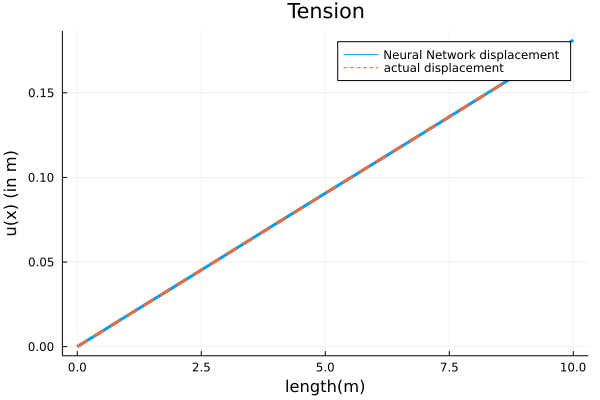

In [16]:
p = plot(dom,TensionU.(dom),linewidth = 3, title = "Tension", label = "Neural Network displacement",xaxis="length(m)",yaxis="u(x) (in m)")
p = plot!(dom,analytic_solution_Tension.(dom),lw=3,ls=:dash,label = "actual displacement")
savefig("tension_result.pdf")
plot(p)

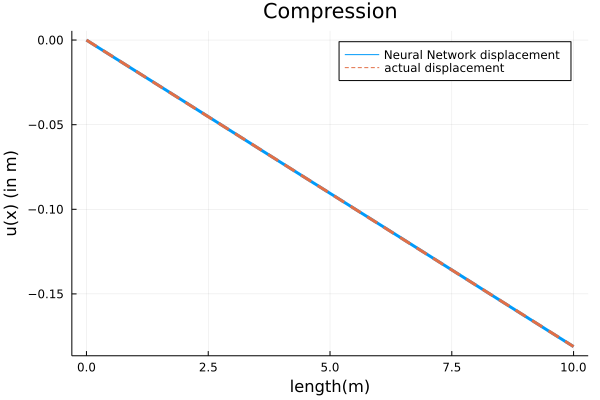

In [17]:
p1 = plot(dom,CompressionU.(dom),linewidth = 3, title = "Compression", label = "Neural Network displacement",xaxis="length(m)",yaxis="u(x) (in m)")
p1 = plot!(dom,analytic_solution_Compression.(dom),lw=3,ls=:dash,label = "actual displacement")
savefig("comp_result.pdf")
plot(p1)